In [88]:
!pip install kaggle

In [89]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [90]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [91]:
from zipfile import ZipFile
dataset = "/content/face-mask-dataset.zip"

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print("The Dataset is extracted")

The Dataset is extracted


In [92]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


In [93]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [94]:
with_mask_files = os.listdir("/content/data/with_mask")
without_mask_files = os.listdir("/content/data/without_mask")

print(f"Number of with_mask {len(with_mask_files)}")
print(f"Number of without_mask {len(without_mask_files)}")

Number of with_mask 3725
Number of without_mask 3828


In [95]:
with_mask_labels = [1] * 3725
without_mask_labels = [0] * 3828
labels = with_mask_labels + without_mask_labels

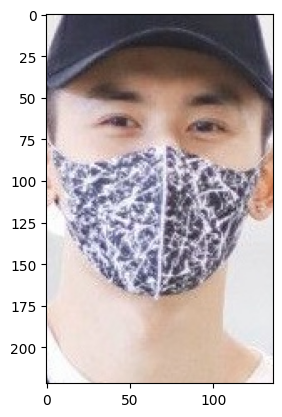

In [96]:
img = mpimg.imread("/content/data/with_mask/with_mask_954.jpg")
plt.imshow(img)

In [97]:
with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:
  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

without_mask_path = '/content/data/without_mask/'

for img_file in without_mask_files:
  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


(128, 128, 3)


array([[[236, 236, 236],
        [234, 234, 232],
        [239, 238, 235],
        ...,
        [239, 238, 236],
        [239, 238, 234],
        [239, 238, 234]],

       [[237, 236, 235],
        [238, 237, 235],
        [238, 237, 232],
        ...,
        [240, 239, 237],
        [238, 237, 232],
        [240, 239, 235]],

       [[238, 237, 235],
        [235, 234, 232],
        [235, 234, 231],
        ...,
        [237, 236, 234],
        [240, 239, 236],
        [239, 238, 234]],

       ...,

       [[208, 207, 216],
        [246, 245, 253],
        [242, 242, 247],
        ...,
        [249, 243, 247],
        [248, 242, 244],
        [247, 241, 244]],

       [[133, 133, 145],
        [225, 225, 235],
        [236, 236, 243],
        ...,
        [251, 244, 248],
        [250, 244, 246],
        [245, 239, 241]],

       [[ 66,  65,  79],
        [141, 141, 153],
        [243, 243, 254],
        ...,
        [249, 243, 245],
        [247, 241, 243],
        [248, 242, 244]]], dtype=uint8)
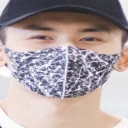

In [98]:
print(data[0].shape)
data[0]

In [99]:
X = np.array(data)
y = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=40)

X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [100]:
import tensorflow as tf
from tensorflow import keras

In [101]:
num_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_classes, activation='softmax'))

In [102]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [103]:
history = model.fit(X_train_scaled, y_train, validation_split=0.1, epochs=15)

Epoch 1/15
170/170 ━━━━━━━━━━━━━━━━━━━━ 12s 46ms/step - acc: 0.7420 - loss: 0.7569 - val_acc: 0.8760 - val_loss: 0.2940
Epoch 2/15
170/170 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - acc: 0.8867 - loss: 0.2692 - val_acc: 0.9025 - val_loss: 0.2042
Epoch 3/15
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - acc: 0.9219 - loss: 0.2071 - val_acc: 0.9223 - val_loss: 0.1792
Epoch 4/15
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - acc: 0.9402 - loss: 0.1506 - val_acc: 0.9339 - val_loss: 0.1842
Epoch 5/15
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - acc: 0.9549 - loss: 0.1147 - val_acc: 0.9289 - val_loss: 0.1888
Epoch 6/15
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - acc: 0.9749 - loss: 0.0754 - val_acc: 0.9421 - val_loss: 0.1786
Epoch 7/15
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - acc: 0.9774 - loss: 0.0600 - val_acc: 0.9322 - val_loss: 0.1955
Epoch 8/15
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - acc: 0.9812 - loss: 0.0497 - val_acc: 0.9471 - val_loss: 0.1654
Epoch 9/15
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 19m

In [104]:
loss, accuracy = model.evaluate(X_test_scaled,y_test)
print(f"Test Acuracy = {accuracy:.4f}, Loss = {loss:.4f}")

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - acc: 0.9193 - loss: 0.3520
Test Acuracy = 0.9232, Loss = 0.3430


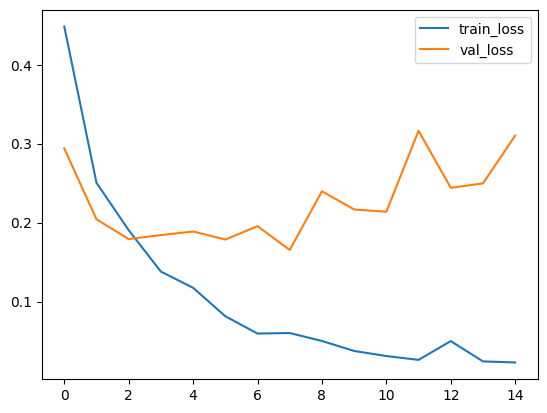

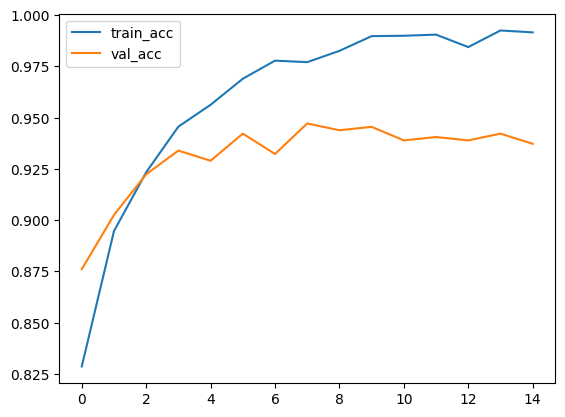

In [105]:
h = history

plt.plot(h.history['loss'], label="train_loss")
plt.plot(h.history['val_loss'], label="val_loss")
plt.legend()
plt.show()

plt.plot(h.history['acc'], label="train_acc")
plt.plot(h.history['val_acc'], label="val_acc")
plt.legend()
plt.show()

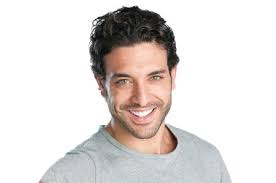

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
[[9.9974614e-01 2.5388828e-04]]
0
The person is not wearing a mask


In [112]:
input_image_path = "/content/data/without_mask/without_mask_1000.jpg"
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
input_image_resized = np.reshape(cv2.resize(input_image, (128,128))/255,[1,128,128,3])
input_prediction = model.predict(input_image_resized)
print(input_prediction)
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

if input_pred_label == 0:
  print("The person is not wearing a mask")
else:
  print("The person is wearing a mask")